# Deeper Depth Prediction with Fully Convolutional Residual Networks

By [Iro Laina](http://campar.in.tum.de/Main/IroLaina), [Christian Rupprecht](http://campar.in.tum.de/Main/ChristianRupprecht), [Vasileios Belagiannis](http://www.robots.ox.ac.uk/~vb/), [Federico Tombari](http://campar.in.tum.de/Main/FedericoTombari), [Nassir Navab](http://campar.in.tum.de/Main/NassirNavab).

Modified from predict.py

In [6]:
import argparse
import glob, os
import numpy as np
import scipy.ndimage
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import image as im
%matplotlib inline
from PIL import Image
import time

import models

## Loading the model

In [2]:
# Path to pre-trained model
model_data_path = "./NYU_ResNet-UpProj.npy"
# Default input size
height = 228
width = 304
channels = 3
batch_size = 1
# Create a placeholder for the input image
input_node = tf.placeholder(tf.float32, shape=(None, height, width, channels))
    
# Construct the network
net = models.ResNet50UpProj({'data': input_node}, batch_size)
    
sess = tf.Session()
    
# Load the converted parameters
start_time = time.time()
print('Loading the model...')
net.load(model_data_path, sess)
    
uninitialized_vars = []
for var in tf.global_variables():
    try:
        sess.run(var)
    except tf.errors.FailedPreconditionError:
        uninitialized_vars.append(var)
            
init_new_vars_op = tf.variables_initializer(uninitialized_vars)
sess.run(init_new_vars_op)
print('Model is ready')
print("--- Model loading time: %s seconds ---" % (time.time() - start_time))

Loading the model...
Model is ready
--- Model loading time: 139.30074286460876 seconds ---


## Predict the single depth images
### You can skip this step to the next one if you want to predict series of images

Reading image
--- Image reading time : 0.013988256454467773 seconds ---
Predicting
<class 'numpy.ndarray'>
--- Predicting time : 0.9169960021972656 seconds ---


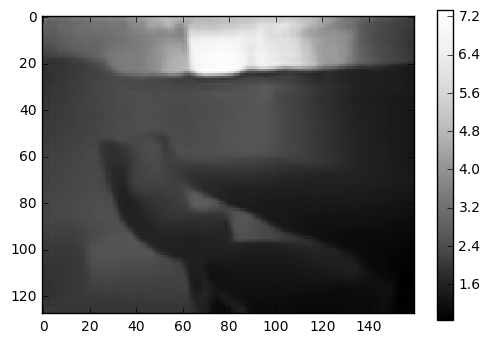

1 160 128 1


In [18]:
start_time = time.time()
print('Reading image')
# Read image
image_path = "./Images/new_office.jpg"
img = Image.open(image_path)
img = img.resize([width,height], Image.ANTIALIAS)
img = np.array(img).astype('float32')
img = np.expand_dims(np.asarray(img), axis = 0)
print("--- Image reading time : %s seconds ---" % (time.time() - start_time))
print('Predicting')
start_time = time.time()
pred = sess.run(net.get_output(), feed_dict={input_node: img})
print(type(pred))
print("--- Predicting time : %s seconds ---" % (time.time() - start_time))

# Plot result
fig = plt.figure()
ii = plt.imshow(pred[0,:,:,0], interpolation='nearest', cmap=plt.cm.get_cmap('Greys_r'))
fig.colorbar(ii)
plt.show()

(m, predsizey, predsizex, n) = pred.shape
print (m, predsizex, predsizey, n)
upscaled = scipy.ndimage.interpolation.zoom(pred[0,:,:,0], (480./128, 640./160))

im.imsave("test",upscaled,cmap=plt.cm.get_cmap('Greys_r'))

Predict multiple depth images
------------------------

In [19]:
# windows
# seriesPath = ".\series"
# outputPath = ".\output"
# seriesFiles = seriesPath + "\*.png"
# Linux
seriesPath = "./series"
outputPath = "./output"
seriesFiles = seriesPath + "/*.png"

# Length of path
seriesPathLength = len(seriesPath)
print(seriesPathLength)
start_time = time.time()

# get file name
for file in glob.glob(seriesFiles):
    filename = file[seriesPathLength + 1:]
    print(filename)
    img = Image.open(file)
    img = img.resize([width,height], Image.ANTIALIAS)
    img = np.array(img).astype('float32')
    img = np.expand_dims(np.asarray(img), axis = 0)
    # predict
    pred = sess.run(net.get_output(), feed_dict={input_node: img})
    upscaled = scipy.ndimage.interpolation.zoom(pred[0,:,:,0], (480./128, 640./160))
    # save the depth map
    # Windows
    # im.imsave(outputPath + "\\" + filename, upscaled, cmap=plt.cm.get_cmap('Greys_r'))
    # Linux
    im.imsave(outputPath + "/" + filename, upscaled, cmap=plt.cm.get_cmap('Greys_r'))
    #print (filename + " saved" + " in" + outputPath)
    
    
print("--- Predicting time : %s seconds ---" % (time.time() - start_time))
    


8
1341847980.722988.png
1341847980.754743.png
1341847980.786856.png
1341847980.822978.png
1341847980.854676.png
1341847980.890728.png
1341847980.922978.png
1341847980.954645.png
1341847980.990699.png
1341847981.022715.png
1341847981.054711.png
1341847981.090715.png
1341847981.122985.png
1341847981.158632.png
1341847981.190636.png
1341847981.222978.png
1341847981.258722.png
1341847981.290787.png
--- Predicting time : 19.834009170532227 seconds ---


In [5]:
sess.close()